In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import bottleneck as bn
import pickle


In [ ]:

data = np.load("training_data/trajectory_BallRacingTask_episode_31.pkl", allow_pickle=True)

print(data.keys())
rewards = data["rewards"]
rewards = np.array(rewards)

print(np.mean(rewards))
plt.plot(rewards)
move_mean = bn.move_mean(rewards, window=100)
plt.plot(move_mean)


In [ ]:
pos_ball = data["features"][0,:,-3,:]
pos_com = data["features"][0,:,-4,:]
plt.plot(pos_com[:,0], pos_com[:,1], marker="o", markersize=1, label="COM")
plt.plot(pos_ball[:,0], pos_ball[:,1], marker="o", markersize=1, label="Ball")
plt.legend()
actions = data["actions"]
print(actions.shape)
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].plot(actions[:, 0],label="B_x")
ax[0, 0].plot(actions[:, 1],label="B_y")
ax[0, 0].legend()
ax[0, 1].plot(actions[:, 2],label="f_x")
ax[0, 1].plot(actions[:, 3],label="f_y")
ax[0, 1].legend()

ax[1, 1].plot(actions[:, 4],label="grad_x")
ax[1, 1].plot(actions[:, 5],label="grad_y")
ax[1, 1].legend()


(11, 3)


Text(0.5, 1.0, 'temperature')

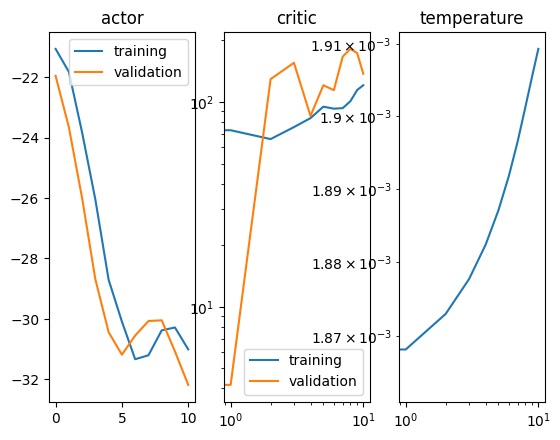

In [6]:

import numpy as np
from matplotlib import pyplot as plt
training_losses = np.load("training_losses.npy", allow_pickle=True)
validation_losses = np.load("validation_losses.npy", allow_pickle=True)
temperature = np.load("temperature_history.npy", allow_pickle=True)
print(training_losses.shape)
fig, ax = plt.subplots(1,3)
ax[0].plot(training_losses[:,0], label="training")
ax[0].plot(validation_losses[:,0], label="validation")
ax[0].set_title("actor")
ax[0].legend()

ax[1].loglog(training_losses[:,1], label="training")
ax[1].loglog(validation_losses[:,1], label="validation")
ax[1].set_title("critic")
ax[1].legend()
ax[2].loglog(temperature)
ax[2].set_title("temperature")